In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, Dropout, BatchNormalization, Flatten, MaxPooling2D, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [2]:
import keras
import tensorflow as tf
print(f"Keras version: {keras.__version__}")
print(f"TensorFlow version: {tf.__version__}")

Keras version: 3.10.0
TensorFlow version: 2.19.0


In [3]:
# Download the weather images and put them in a directory

path = r"C:\Users\18478\OneDrive\Desktop\Career Foundry Data Analytics Course\Career Foundry Machine Learning\Data Sets\Unsupervised\Multi-class Weather Dataset"
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [4]:
# This will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=12,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=12,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [5]:
# This is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [6]:
# How many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 16,
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

C:\Users\18478\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 46s 573ms/step - accuracy: 0.5266 - loss: 0.1356 - val_accuracy: 0.5880 - val_loss: 0.1387
Epoch 2/16
 1/75 ━━━━━━━━━━━━━━━━━━━━ 21s 291ms/step - accuracy: 0.5000 - loss: 0.1542

C:\Users\18478\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.5000 - loss: 0.1542 - val_accuracy: 0.6111 - val_loss: 0.1348
Epoch 3/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 43s 570ms/step - accuracy: 0.7181 - loss: 0.0910 - val_accuracy: 0.6481 - val_loss: 0.1131
Epoch 4/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.8333 - loss: 0.0670 - val_accuracy: 0.5926 - val_loss: 0.1262
Epoch 5/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 428ms/step - accuracy: 0.7527 - loss: 0.0900 - val_accuracy: 0.7500 - val_loss: 0.0886
Epoch 6/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.9167 - loss: 0.0522 - val_accuracy: 0.7407 - val_loss: 0.0948
Epoch 7/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 35s 467ms/step - accuracy: 0.7991 - loss: 0.0746 - val_accuracy: 0.6620 - val_loss: 0.1510
Epoch 8/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.5000 - loss: 0.2071 - val_accuracy: 0.6296 - val_loss: 0.1735
Epoch 9/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 40s 519ms/step - accuracy: 0.7722 - loss: 0.0896 - val_accuracy: 0.6898 - val_

In [7]:
results = pd.DataFrame(model.history.history)

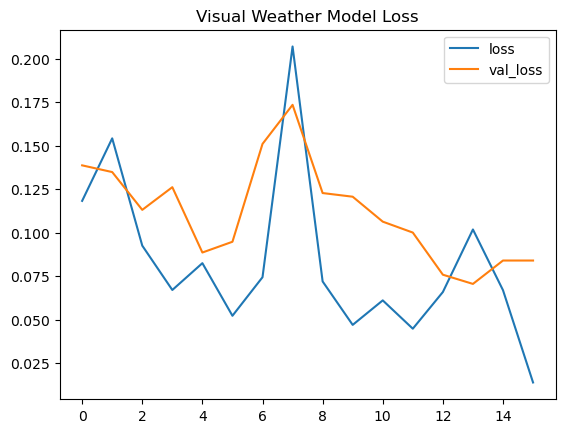

In [11]:
results[['loss','val_loss']].plot(title='Visual Weather Model Loss')
plt.savefig('./loss.png')

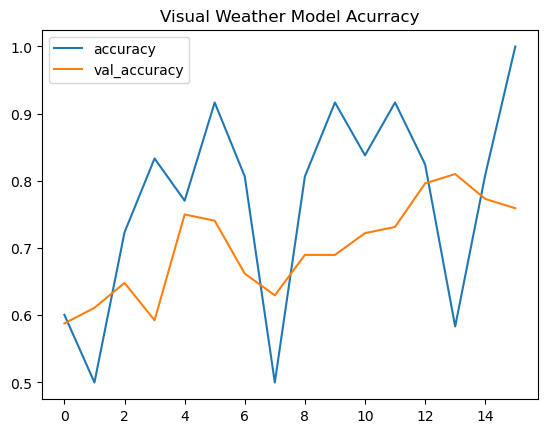

In [12]:
results[['accuracy','val_accuracy']].plot(title='Visual Weather Model Acurracy')
plt.savefig('./accuracy.png')

In [13]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 1.0, Val_Accuracy: 0.7592592835426331
Loss: 0.013837270438671112, Val_Loss: 0.08396739512681961


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 195ms/step


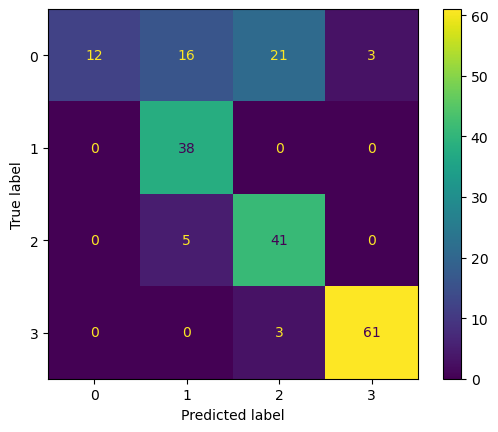

<Figure size 640x480 with 0 Axes>

In [15]:
# Collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 16 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

# Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
plt.savefig('confusion_matrix_visual_weather.png')

In [16]:
# This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


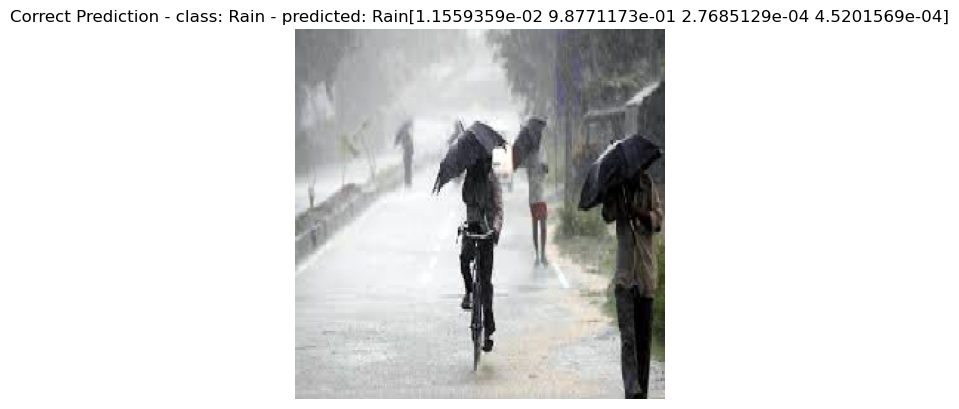

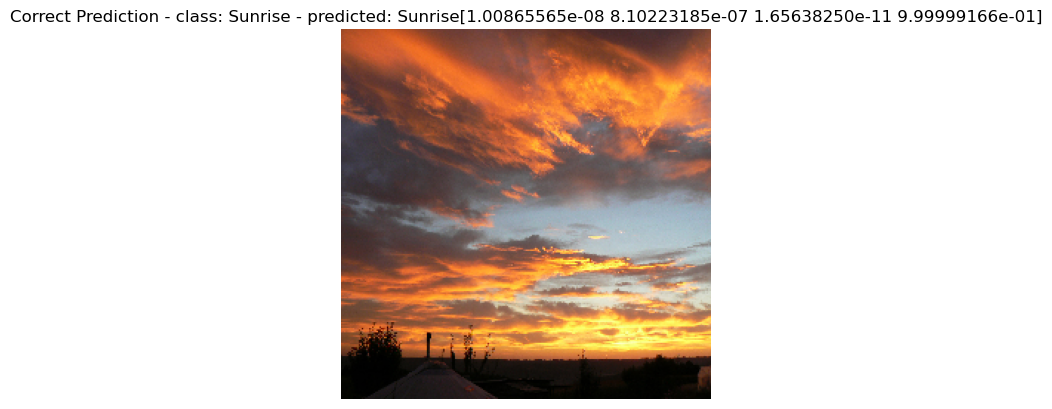

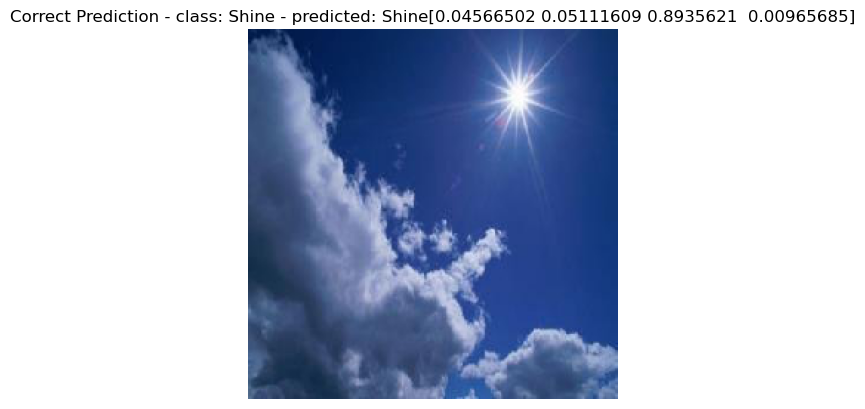

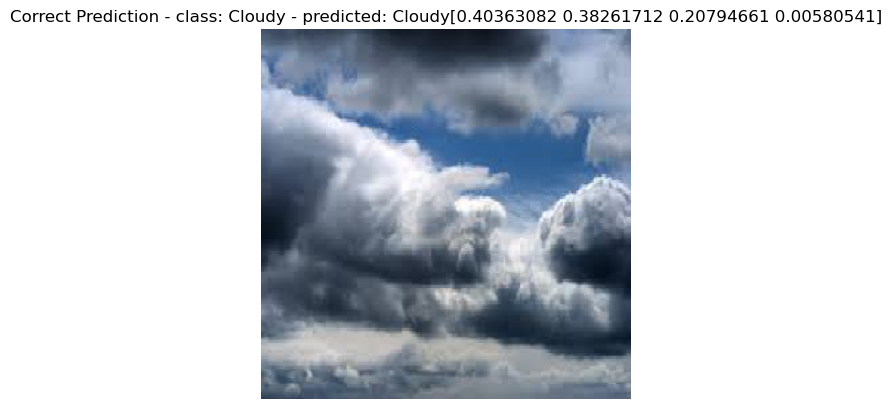

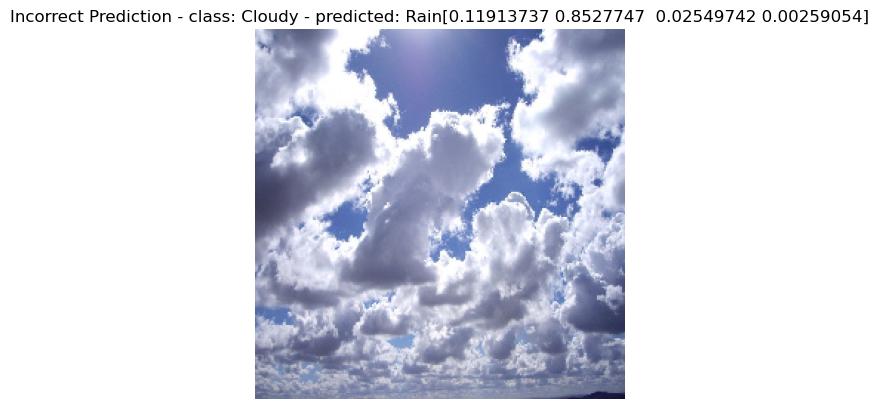

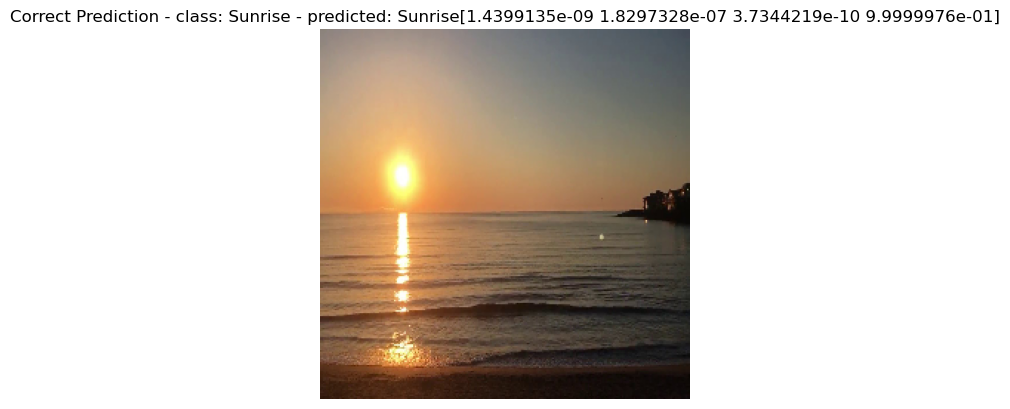

In [17]:
predict_one(model, 6) #<--you can show multiple pictures with this command. Just fill in the number you want to see.